# Google Datasets

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
google = pd.read_csv("Preprocessed Dataset/Preprocessed_Google_Dataset.csv")
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2737 entries, 0 to 2736
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2737 non-null   object 
 1   Open       2737 non-null   float64
 2   High       2737 non-null   float64
 3   Low        2737 non-null   float64
 4   Close      2737 non-null   float64
 5   Adj Close  2737 non-null   float64
 6   Volume     2737 non-null   int64  
 7   Company    2737 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 171.2+ KB


In [5]:
google['Date'] = pd.to_datetime(google['Date'])
google.set_index('Date', inplace=True)

# Train test split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
features = ['Open', 'High', 'Low', 'Volume']
X = google[features]
y = google['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Closing Visualization

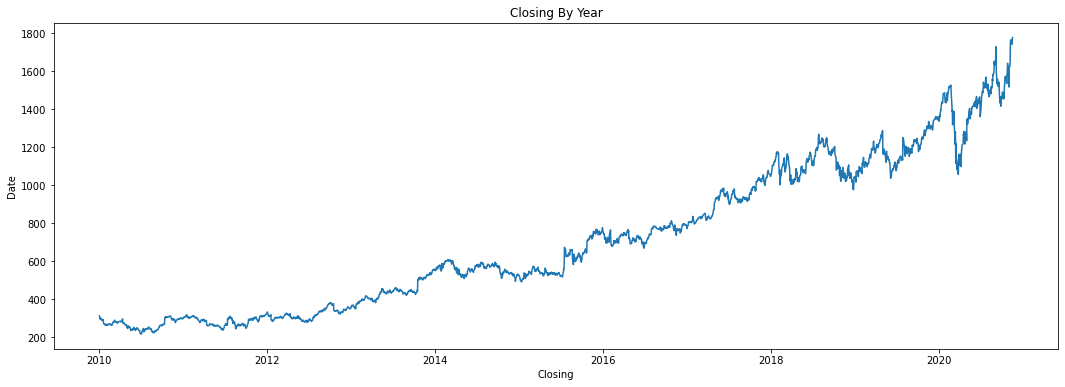

In [30]:
plt.figure(figsize=(18,6))
plt.title("Closing By Year")
plt.xlabel('Closing')
plt.ylabel('Date')
plt.plot(google['Close'])

# Linear Regression

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [14]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test_scaled)

In [22]:
y_pred = np.squeeze(np.array(y_pred))
y_test = np.array(y_test)

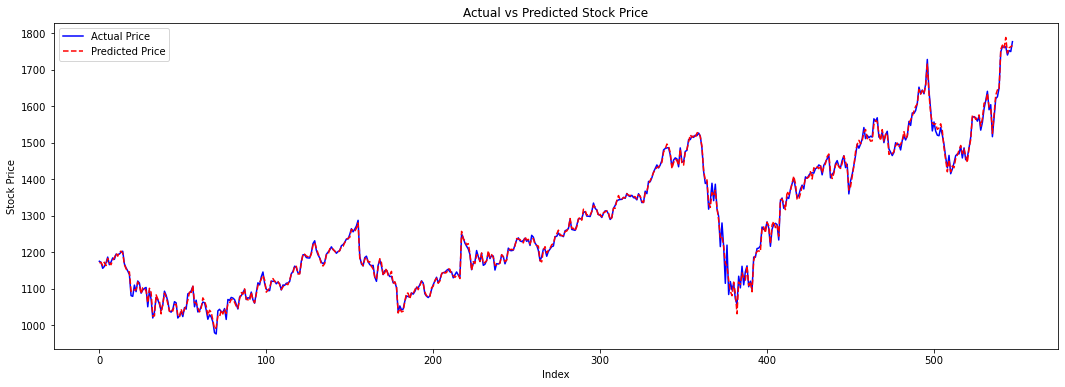

In [29]:
plt.figure(figsize=(18,6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Price', color='blue')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted Price', color='red', linestyle='--')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Price')
plt.show()

In [28]:
from sklearn.metrics import r2_score
r2s = r2_score(y_test,y_pred)
print(r2s)

0.9975707885595303
